In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")

In [3]:
import data_handling as dh
import subsampling as ss
from core import SITE_NAMES, DC_COLOR_MAPPINGS

from cli import get_file_paths
import plotting
import pipeline

In [4]:
type_key = 'LF1'
site_key = "Carp"
# cycle_lengths = [1800, 720, 600, 360, 180, 60, 30, 6]
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['recording_start'] = '02:00'
data_params['recording_end'] = '13:30'
data_params

{'site_name': 'Carp Pond',
 'site_tag': 'Carp',
 'type_tag': 'LF1',
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution_in_min': '30',
 'recording_start': '02:00',
 'recording_end': '13:30'}

In [7]:
file_paths = get_file_paths(data_params)
file_paths

{'raw_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/raw/Carp',
 'SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp',
 'bd2_TYPE_SITE_YEAR': 'bd2__LF1Carp_2022',
 'duty_cycled_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled',
 'dc_dets_TYPE_SITE_summary': 'dc_dets_LF1Carp_summary',
 'dc_bouts_TYPE_SITE_summary': 'dc_bouts_LF1Carp_summary',
 'dc_inds_TYPE_SITE_summary': 'dc_inds_LF1Carp_summary',
 'simulated_schemes_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled/simulated_schemes',
 'figures_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Carp',
 'activity_det_comparisons_figname': 'activity_det_comparisons_per_dc_LF1Carp',
 'dc_det_comparisons_figname': 'dc_det_comparisons_per_night_LF1Carp',
 'activity_bout_comparisons_figname': 'activity_bout_comparisons_per_dc_LF1Carp',
 'dc_bou

In [8]:
activity_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)

In [9]:
activity_arr

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-07-13 02:00:00                                0.0   
2022-07-13 02:30:00                                0.0   
2022-07-13 03:00:00                                0.0   
2022-07-13 03:30:00                                0.0   
2022-07-13 04:00:00                                0.0   
...                                                ...   
2022-08-25 11:00:00                               19.0   
2022-08-25 11:30:00                                1.0   
2022-08-25 12:00:00                              202.0   
2022-08-25 12:30:00                               97.0   
2022-08-25 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-07-13 02:00:00                               0.0   
2022-07-13 02:30:00                               0.0   
2022-07-13 03:00:00                               0.0   
2022-07-13 03:30:00                               0.0   
2022-07-13 04:00:00                               0.0   
...                                               ...   
2022-08-25 11:00:00                              15.0   
2022-08-25 11:30:00                               1.0   
2022-08-25 12:00:00                               3.0   
2022-08-25 12:30:00                              94.0   
2022-08-25 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-07-13 02:00:00                             0.0  
2022-07-13 02:30:00                             0.0  
2022-07-13 03:00:00                             0.0  
2022-07-13 03:30:00                             0.0  
2022-07-13 04:00:00                             0.0  
...                                             ...  
2022-08-25 11:00:00                            15.0  
2022-08-25 11:30:00                             0.0  
2022-08-25 12:00:00                            12.0  
2022-08-25 12:30:00                            59.0  
2022-08-25 13:00:00                             0.0  

[1012 rows x 3 columns]

In [10]:
dh.construct_activity_grid_for_number_of_dets(activity_arr, "1800of1800")

Date (UTC)  07/13/22  07/14/22  07/15/22  07/16/22  07/17/22  07/18/22  \
Time (UTC)                                                               
02:00            0.0       0.0       0.0       0.0       0.0       0.0   
02:30            0.0       0.0       0.0       0.0       0.0       1.0   
03:00            0.0       0.0       0.0       0.0       1.0       0.0   
03:30            0.0       0.0       0.0       0.0       0.0       0.0   
04:00            0.0       0.0       0.0      13.0       0.0       0.0   
04:30           43.0       0.0       0.0     135.0       0.0     117.0   
05:00           36.0      24.0      62.0     601.0      86.0      86.0   
05:30          194.0       2.0     162.0    3452.0     196.0    3410.0   
06:00          127.0      74.0    2928.0    3924.0     228.0    2770.0   
06:30           42.0     271.0    3133.0    3620.0     739.0     334.0   
07:00          469.0      44.0    2401.0    5082.0    2110.0    2169.0   
07:30          333.0       7.0    1954.0    3405.0    1291.0    1292.0   
08:00           21.0     439.0     359.0    2374.0     694.0    2746.0   
08:30           72.0     897.0     309.0    2400.0     513.0    1704.0   
09:00           64.0     160.0     783.0    1012.0      96.0     875.0   
09:30           19.0      77.0     210.0    2156.0      21.0     408.0   
10:00           24.0       9.0     166.0    1629.0      35.0     299.0   
10:30           58.0       0.0     277.0     190.0     300.0     312.0   
11:00            2.0       0.0     261.0      92.0     128.0       0.0   
11:30            0.0       0.0       0.0       0.0       0.0      14.0   
12:00            0.0       0.0       0.0       0.0       0.0       0.0   
12:30            0.0       0.0       0.0       0.0       0.0       1.0   
13:00            0.0       0.0       NaN       0.0       0.0       0.0   

Date (UTC)  07/19/22  07/20/22  07/21/22  07/22/22  ...  08/16/22  08/17/22  \
Time (UTC)                                          ...                       
02:00            0.0       0.0       0.0       1.0  ...       0.0       0.0   
02:30            0.0       0.0       0.0       0.0  ...       0.0       0.0   
03:00            0.0       2.0       3.0       2.0  ...       0.0       0.0   
03:30            0.0       0.0       1.0       1.0  ...       0.0      49.0   
04:00            0.0       1.0       0.0       1.0  ...     260.0     645.0   
04:30          132.0      14.0       0.0       0.0  ...    3818.0     449.0   
05:00          109.0      80.0     230.0     829.0  ...     830.0    3806.0   
05:30          222.0     276.0     210.0     800.0  ...     355.0    5187.0   
06:00          204.0     591.0     146.0     247.0  ...     602.0    1007.0   
06:30           54.0     330.0     452.0     157.0  ...     185.0    1099.0   
07:00           47.0    4890.0     117.0    4963.0  ...     640.0     526.0   
07:30          224.0    5681.0     114.0    7932.0  ...     454.0      36.0   
08:00           92.0    4860.0     364.0    9235.0  ...     126.0     155.0   
08:30          124.0    6552.0    2805.0    7459.0  ...      37.0      19.0   
09:00            4.0    7282.0    3076.0    8497.0  ...      87.0       1.0   
09:30          110.0    8549.0    5494.0    5644.0  ...      20.0       2.0   
10:00            4.0    7533.0    4025.0     924.0  ...       1.0       0.0   
10:30           29.0    5578.0    3821.0    2586.0  ...      31.0      12.0   
11:00          177.0    6413.0    3170.0    4981.0  ...      34.0       0.0   
11:30            2.0     240.0     204.0    2564.0  ...       1.0       0.0   
12:00            1.0       1.0       3.0       0.0  ...     730.0       1.0   
12:30            0.0       2.0       2.0       0.0  ...       0.0       0.0   
13:00            0.0       0.0       2.0       1.0  ...       0.0       0.0   

Date (UTC)  08/18/22  08/19/22  08/20/22  08/21/22  08/22/22  08/23/22  \
Time (UTC)                                                               
02:00            0.0     

In [11]:
activity_arr[-23:]

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-08-25 02:00:00                                0.0   
2022-08-25 02:30:00                                0.0   
2022-08-25 03:00:00                                0.0   
2022-08-25 03:30:00                               67.0   
2022-08-25 04:00:00                              130.0   
2022-08-25 04:30:00                               29.0   
2022-08-25 05:00:00                               48.0   
2022-08-25 05:30:00                                4.0   
2022-08-25 06:00:00                              236.0   
2022-08-25 06:30:00                              147.0   
2022-08-25 07:00:00                               39.0   
2022-08-25 07:30:00                              198.0   
2022-08-25 08:00:00                              108.0   
2022-08-25 08:30:00                              166.0   
2022-08-25 09:00:00                              450.0   
2022-08-25 09:30:00                              734.0   
2022-08-25 10:00:00                              324.0   
2022-08-25 10:30:00                               83.0   
2022-08-25 11:00:00                               19.0   
2022-08-25 11:30:00                                1.0   
2022-08-25 12:00:00                              202.0   
2022-08-25 12:30:00                               97.0   
2022-08-25 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-08-25 02:00:00                               0.0   
2022-08-25 02:30:00                               0.0   
2022-08-25 03:00:00                               0.0   
2022-08-25 03:30:00                               0.0   
2022-08-25 04:00:00                              18.0   
2022-08-25 04:30:00                              10.0   
2022-08-25 05:00:00                               0.0   
2022-08-25 05:30:00                               0.0   
2022-08-25 06:00:00                               7.0   
2022-08-25 06:30:00                              19.0   
2022-08-25 07:00:00                              18.0   
2022-08-25 07:30:00                               0.0   
2022-08-25 08:00:00                               0.0   
2022-08-25 08:30:00                               2.0   
2022-08-25 09:00:00                             376.0   
2022-08-25 09:30:00                              43.0   
2022-08-25 10:00:00                             160.0   
2022-08-25 10:30:00                              15.0   
2022-08-25 11:00:00                              15.0   
2022-08-25 11:30:00                               1.0   
2022-08-25 12:00:00                               3.0   
2022-08-25 12:30:00                              94.0   
2022-08-25 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-08-25 02:00:00                             0.0  
2022-08-25 02:30:00                             0.0  
2022-08-25 03:00:00                             0.0  
2022-08-25 03:30:00                             0.0  
2022-08-25 04:00:00                            20.0  
2022-08-25 04:30:00                            10.0  
2022-08-25 05:00:00                             6.0  
2022-08-25 05:30:00                             0.0  
2022-08-25 06:00:00                            50.0  
2022-08-25 06:30:00                             4.0  
2022-08-25 07:00:00                            12.0  
2022-08-25 07:30:00                             5.0  
2022-08-25 08:00:00                             8.0  
2022-08-25 08:30:00                            21.0  
2022-08-25 09:00:00                           129.0  
2022-08-25 09:30:00                           110.0  
2022-08-25 10:00:00                            76.0  
2022-08-25 10:30:00                             5.0  
2022-08-25 11:00:00                            15.0  
2022-08-25

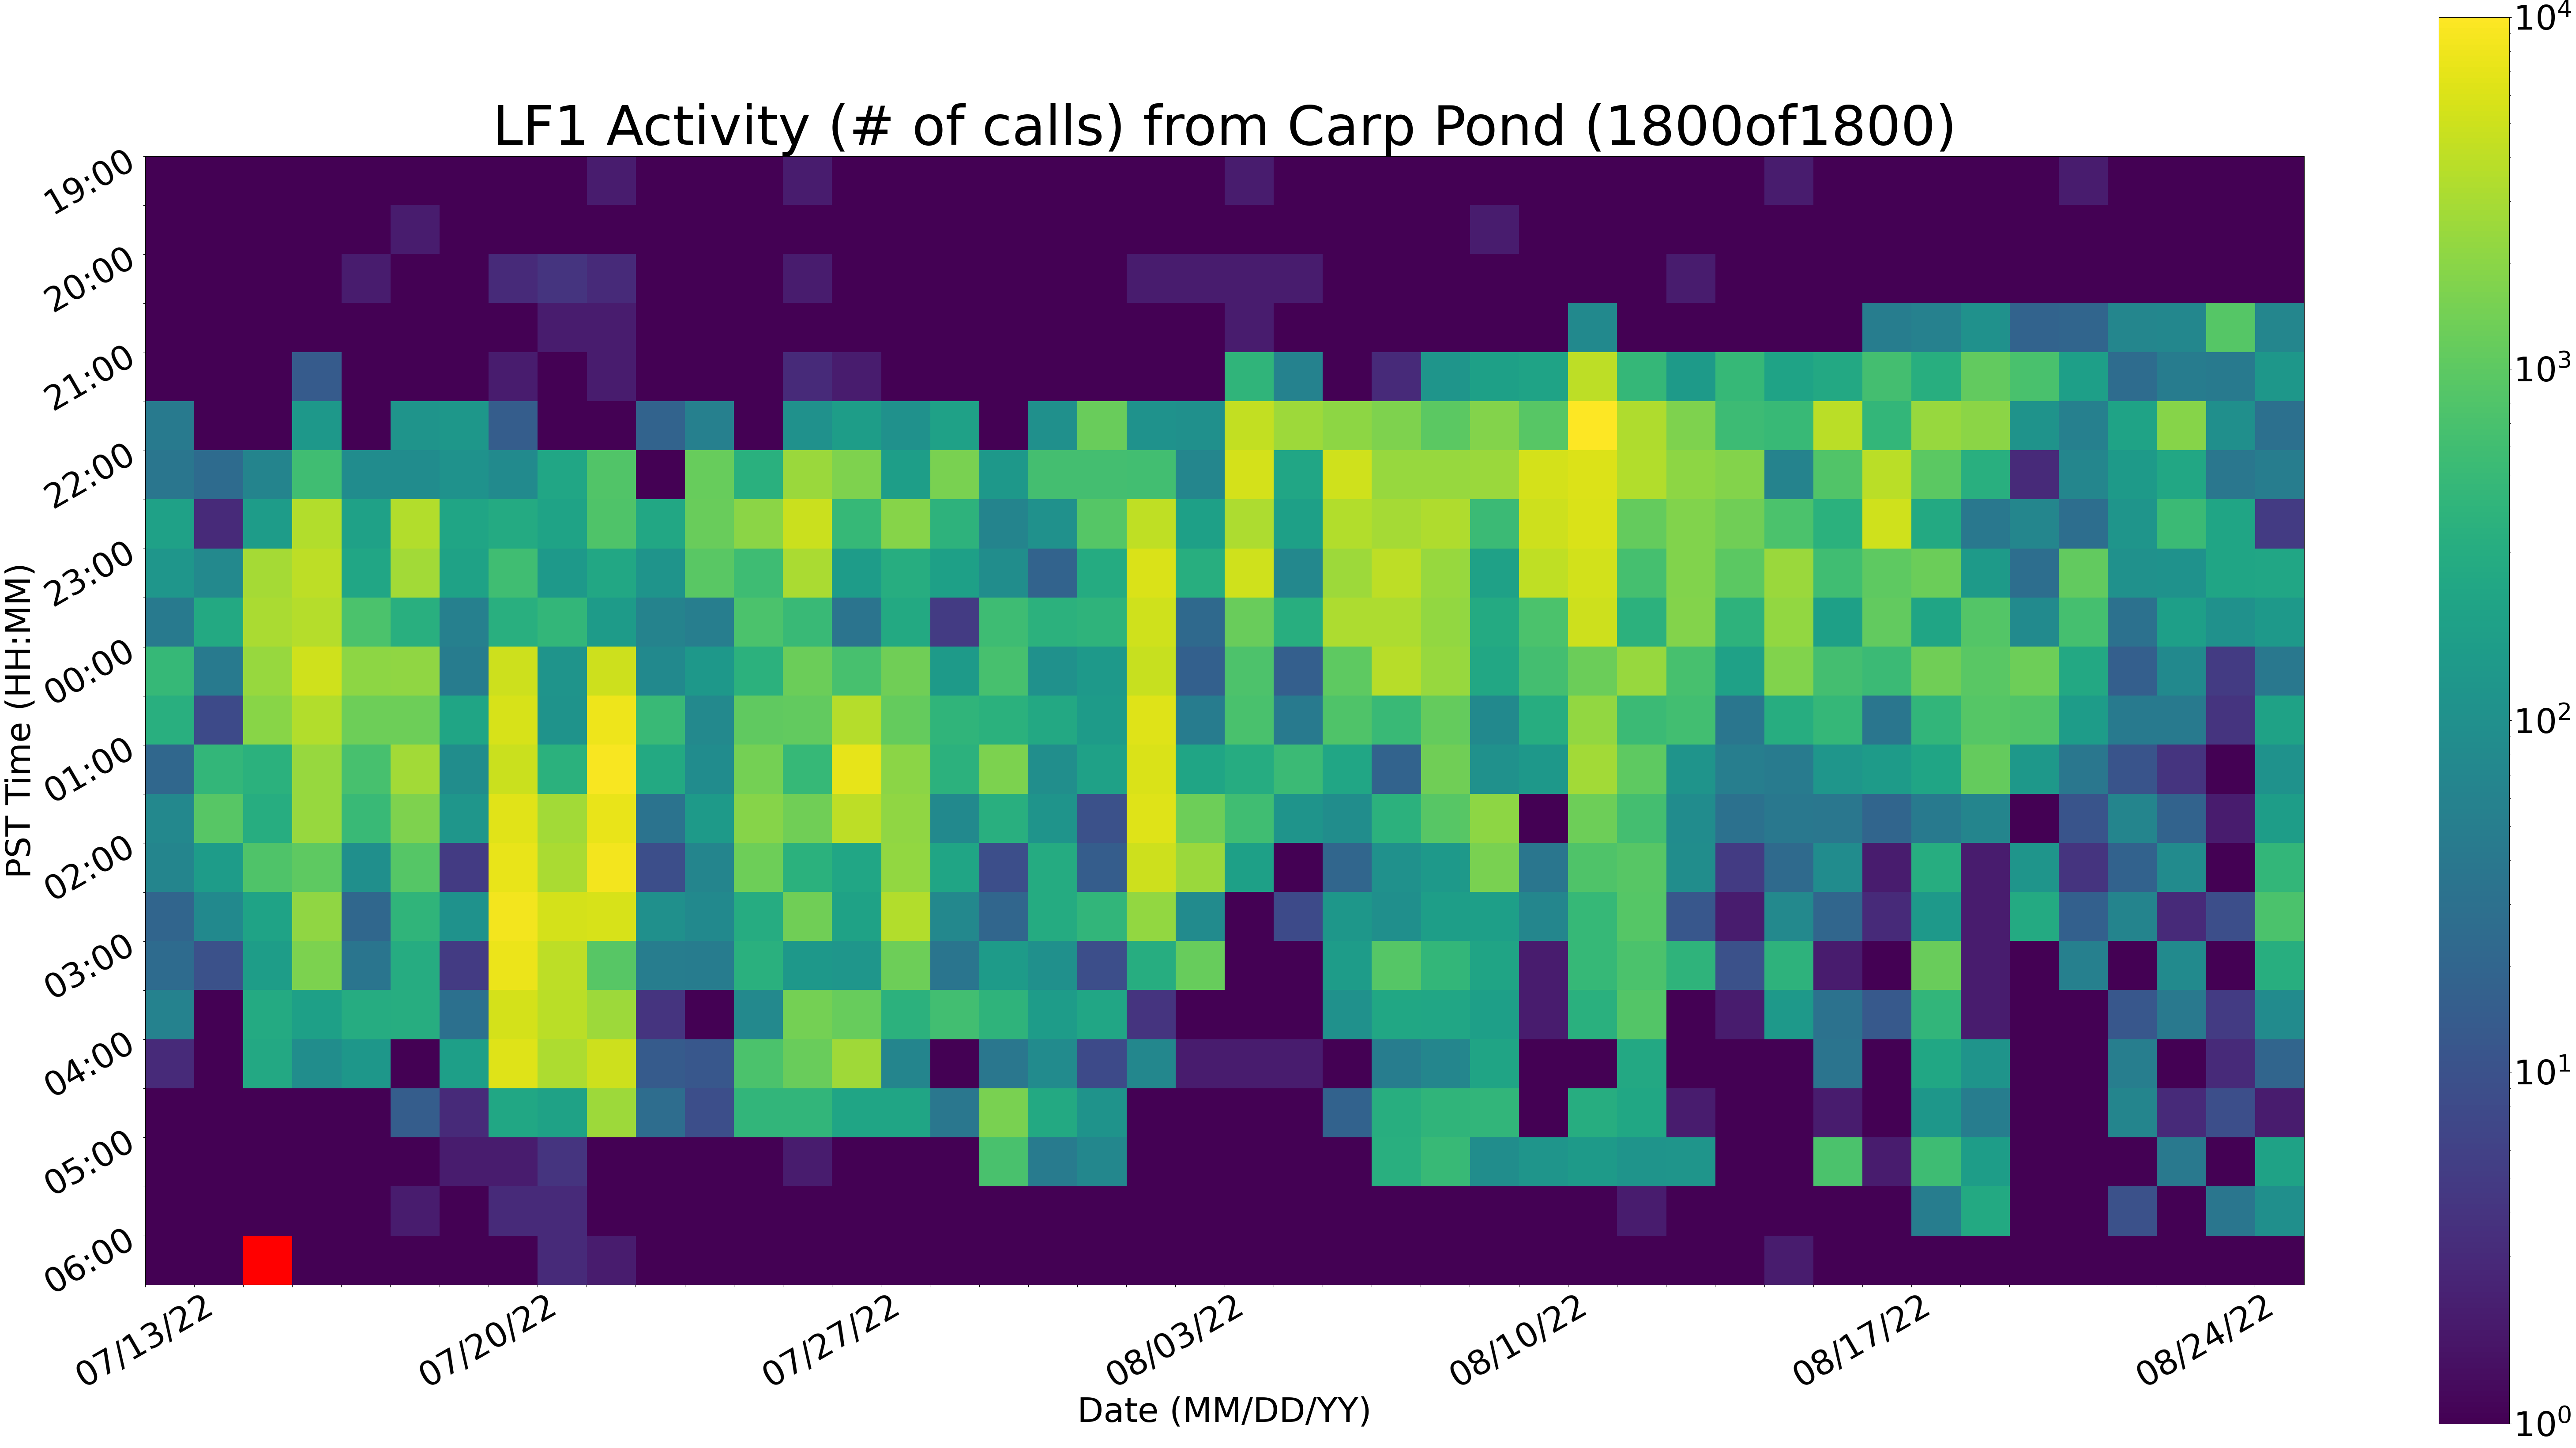

In [12]:
plotting.plot_activity_grid_for_dets(dh.construct_activity_grid_for_number_of_dets(activity_arr, data_params["cur_dc_tag"]), data_params, pipeline_params, file_paths)

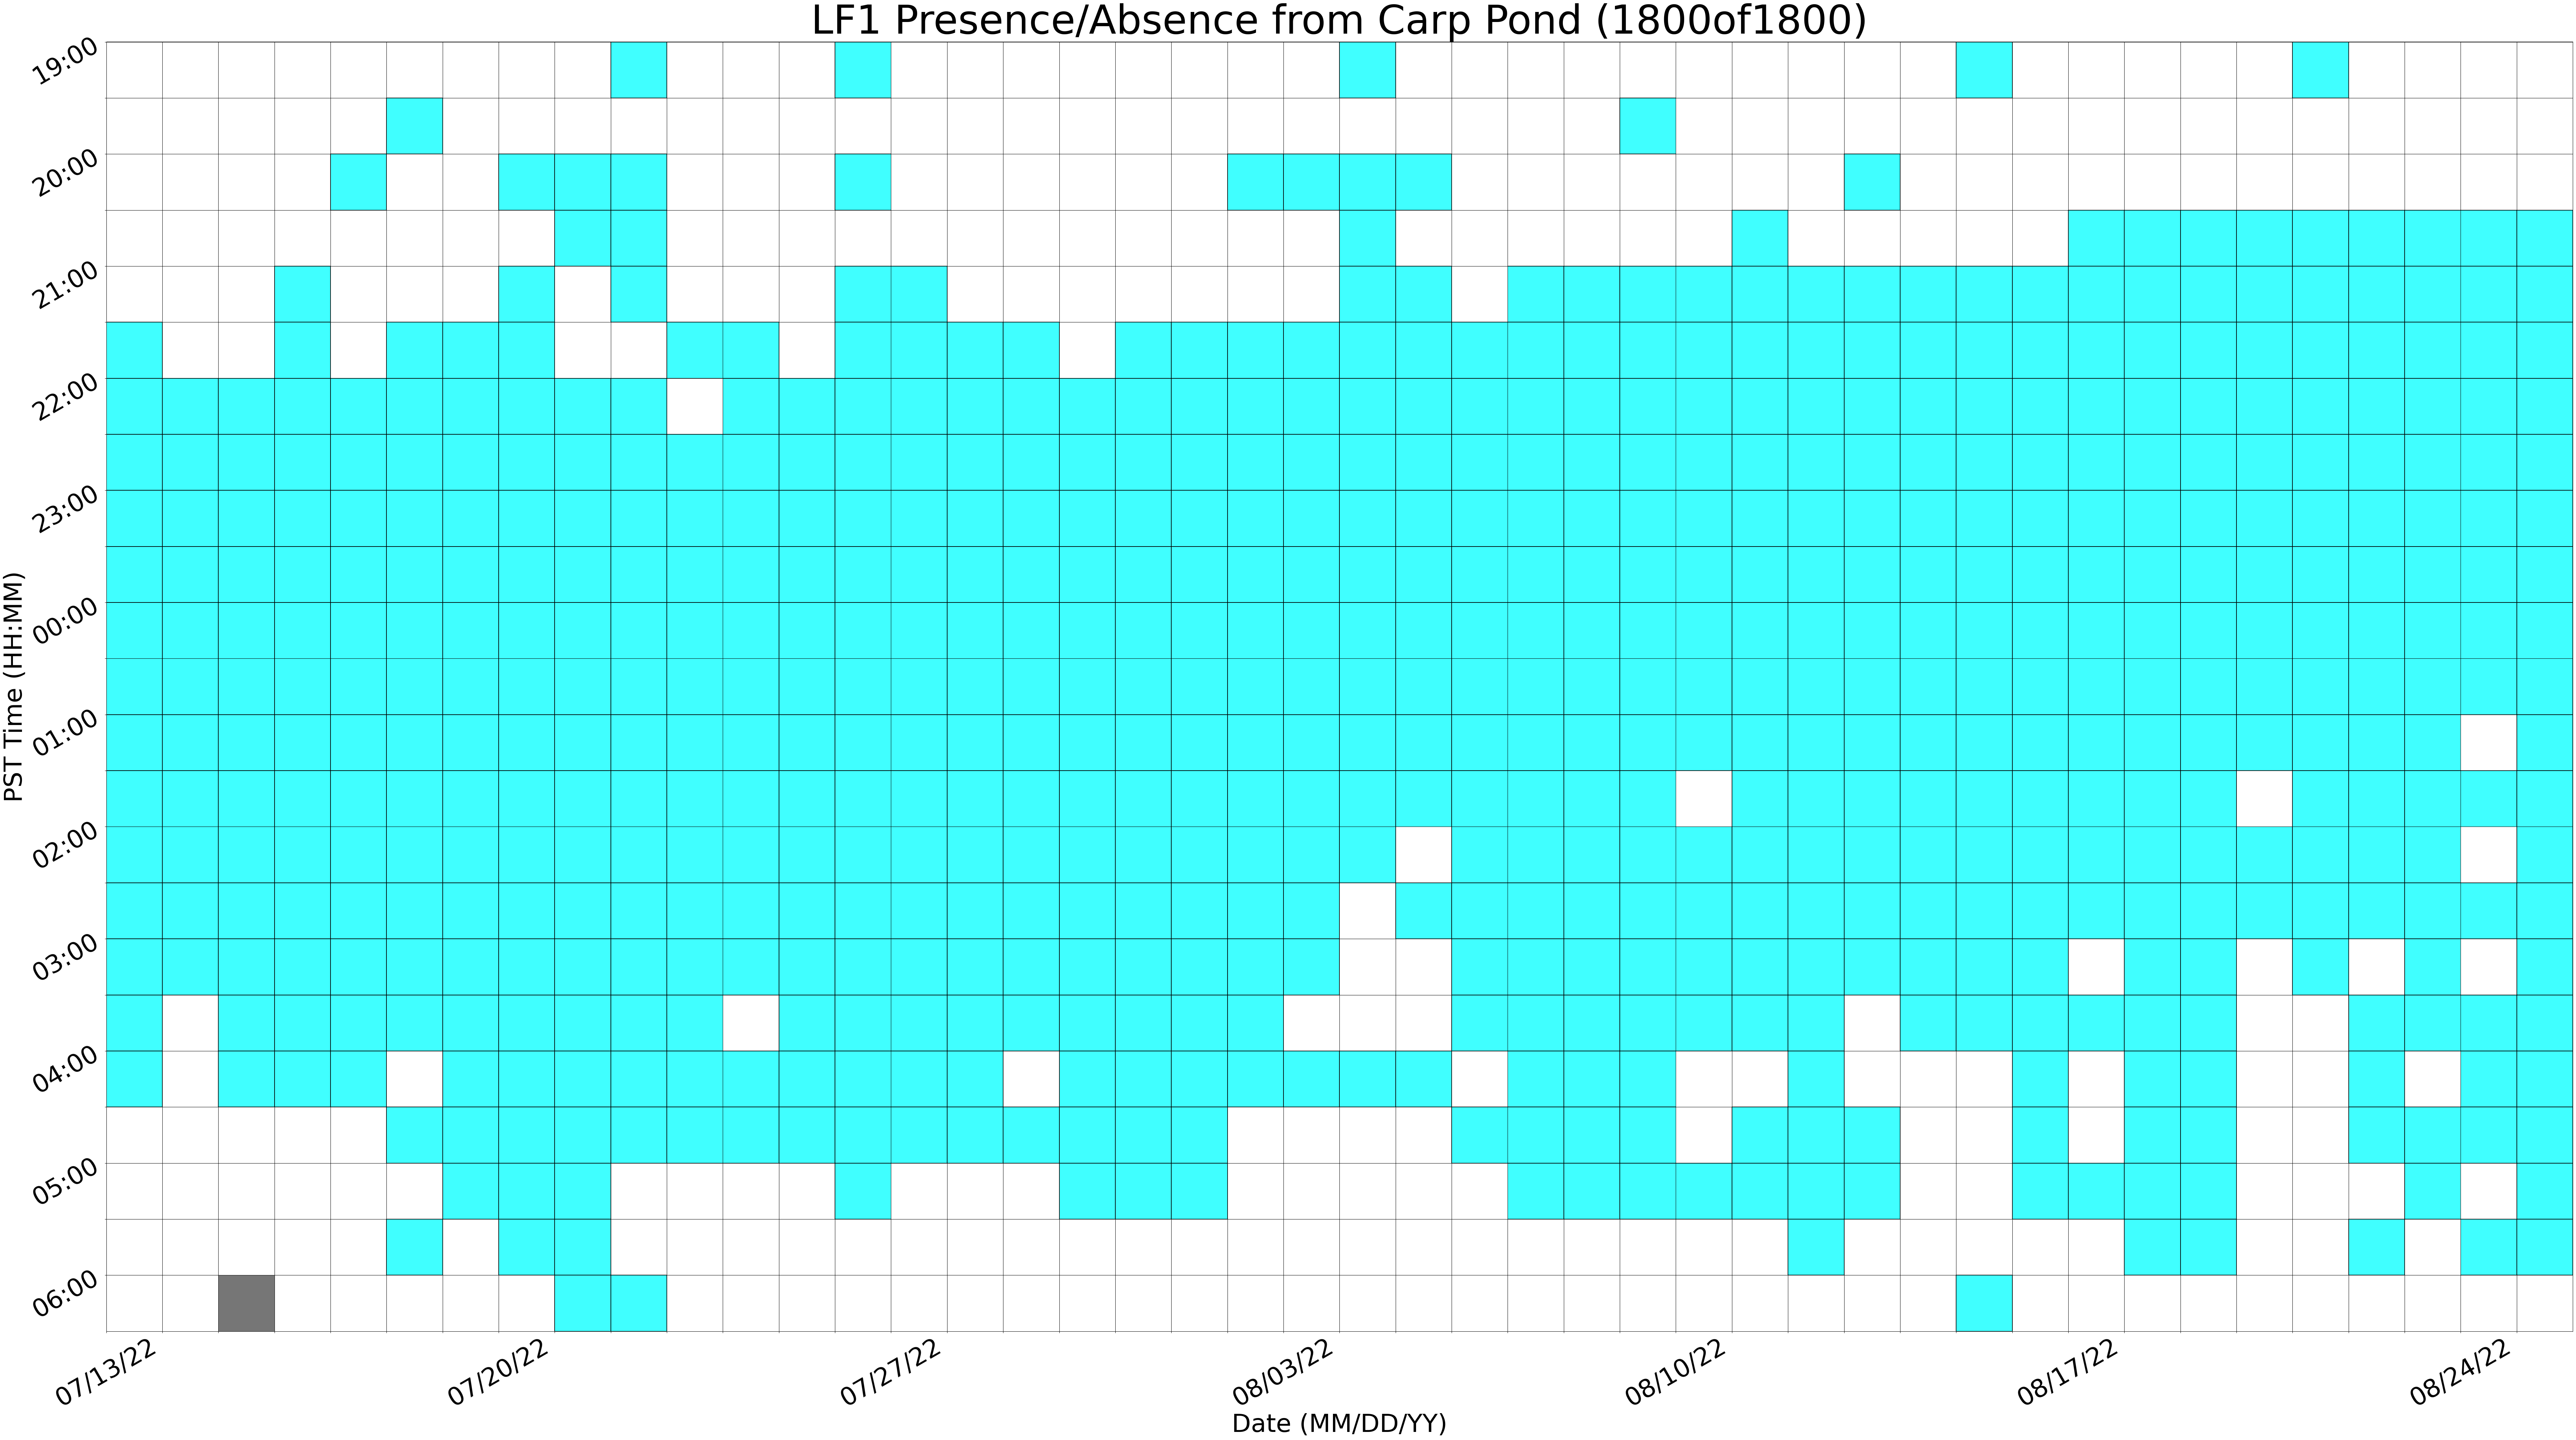

In [13]:
plotting.plot_presence_grid(dh.construct_presence_grid(activity_arr, data_params["cur_dc_tag"]), data_params, pipeline_params, file_paths)
# plotting.plot_dc_dets_comparisons_per_night(activity_arr, data_params, pipeline_params, file_paths)

In [14]:
plotting.plot_dc_det_activity_comparisons_per_scheme(activity_arr, data_params, pipeline_params, file_paths)

In [15]:
plotting.plot_dc_presence_comparisons_per_scheme(activity_arr, data_params, pipeline_params, file_paths)

In [16]:
# pipeline.plot_dets(activity_arr, data_params, pipeline_params, file_paths)